### 계절성 데이터의 ACF, PACF 확인

1958-03-31    316.100000
1958-04-30    317.200000
1958-05-31    317.433333
1958-06-30           NaN
1958-07-31    315.625000
                 ...    
2001-08-31    369.425000
2001-09-30    367.880000
2001-10-31    368.050000
2001-11-30    369.375000
2001-12-31    371.020000
Freq: M, Name: co2, Length: 526, dtype: float64
1958-03-31    316.100000
1958-04-30    317.200000
1958-05-31    317.433333
1958-07-31    315.625000
1958-08-31    314.950000
                 ...    
2001-08-31    369.425000
2001-09-30    367.880000
2001-10-31    368.050000
2001-11-30    369.375000
2001-12-31    371.020000
Name: co2, Length: 521, dtype: float64
1958-03-31    316.100000
1958-04-30    317.200000
1958-05-31    317.433333
1958-07-31    315.625000
1958-08-31    314.950000
Name: co2, dtype: float64


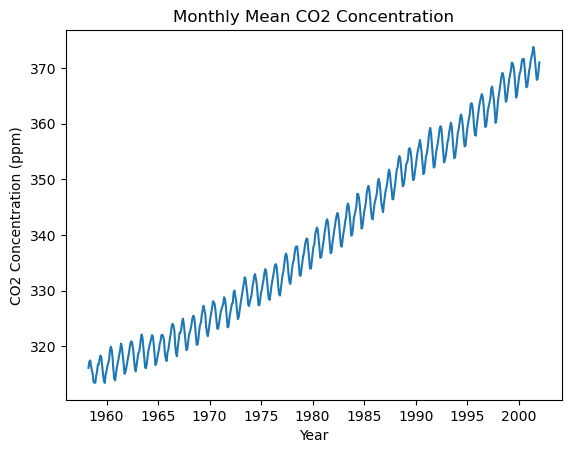

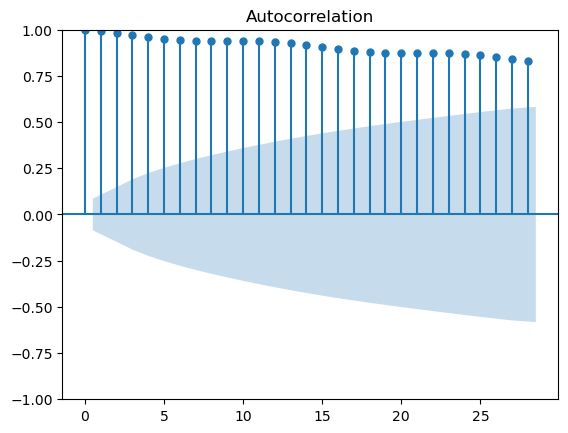

C:\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


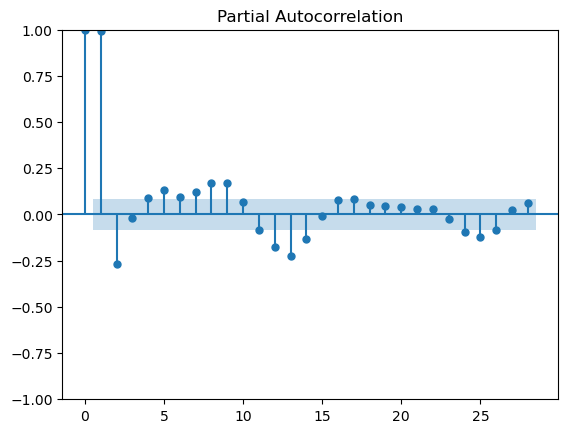

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the data into a Pandas DataFrame
data = sm.datasets.co2.load_pandas()
df = data.data

# Convert the data to a time series format
ts = df['co2'].resample('M').mean()
print(ts)
ts=ts.dropna()
print(ts)
print(ts.head())

# Plot the time series data
plt.plot(ts)
plt.xlabel("Year")
plt.ylabel("CO2 Concentration (ppm)")
plt.title("Monthly Mean CO2 Concentration")
plt.show()

# Plot the ACF and PACF of the time series data
sm.graphics.tsa.plot_acf(ts)
plt.show()
sm.graphics.tsa.plot_pacf(ts)
plt.show()


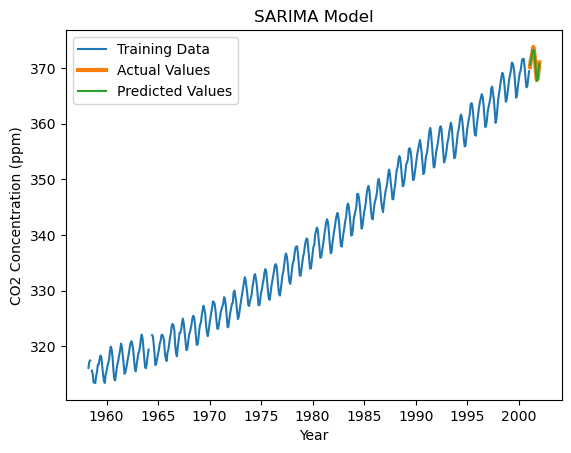

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the data into a Pandas DataFrame
data = sm.datasets.co2.load_pandas()
df = data.data
df=df.dropna(subset=['co2'])

# Convert the data to a time series format
ts = df['co2'].resample('M').mean()

# Split the data into training and testing sets
train = ts[:-12]
test = ts[-12:]

# Fit the SARIMA model to the training data
model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,0,12))
results = model.fit()

# Use the SARIMA model to make predictions for the testing data
predictions = results.predict(start=test.index[0], end=test.index[-1], dynamic=False)

# Plot the actual and predicted values for the testing data
plt.plot(train, label="Training Data")
plt.plot(test, label="Actual Values",linewidth='3')
plt.plot(predictions, label="Predicted Values")
plt.xlabel("Year")
plt.ylabel("CO2 Concentration (ppm)")
plt.title("SARIMA Model")
plt.legend()
plt.show()


In [4]:
print(results.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                 co2   No. Observations:                  514
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 12)   Log Likelihood                -195.158
Date:                             Wed, 08 Feb 2023   AIC                            398.317
Time:                                     20:34:26   BIC                            415.183
Sample:                                 03-31-1958   HQIC                           404.935
                                      - 12-31-2000                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1399      0.120      1.170      0.242      -0.094       0.374
ma.L1         -0.4959      

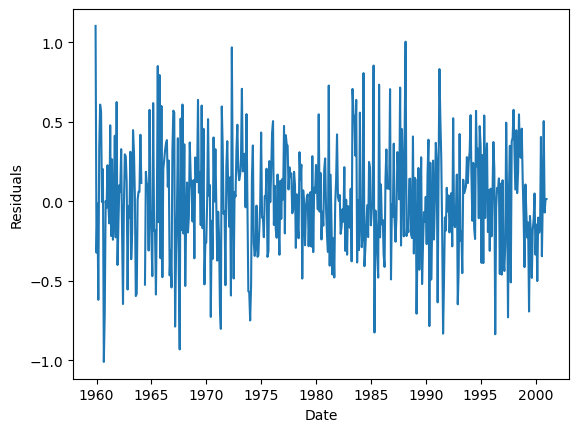

In [9]:
# Get the residuals
residuals = results.resid[20:]

# Plot the residuals
plt.plot(residuals, label='Residuals')

# Add labels
plt.xlabel('Date')
plt.ylabel('Residuals')

# Show the plot
plt.show()

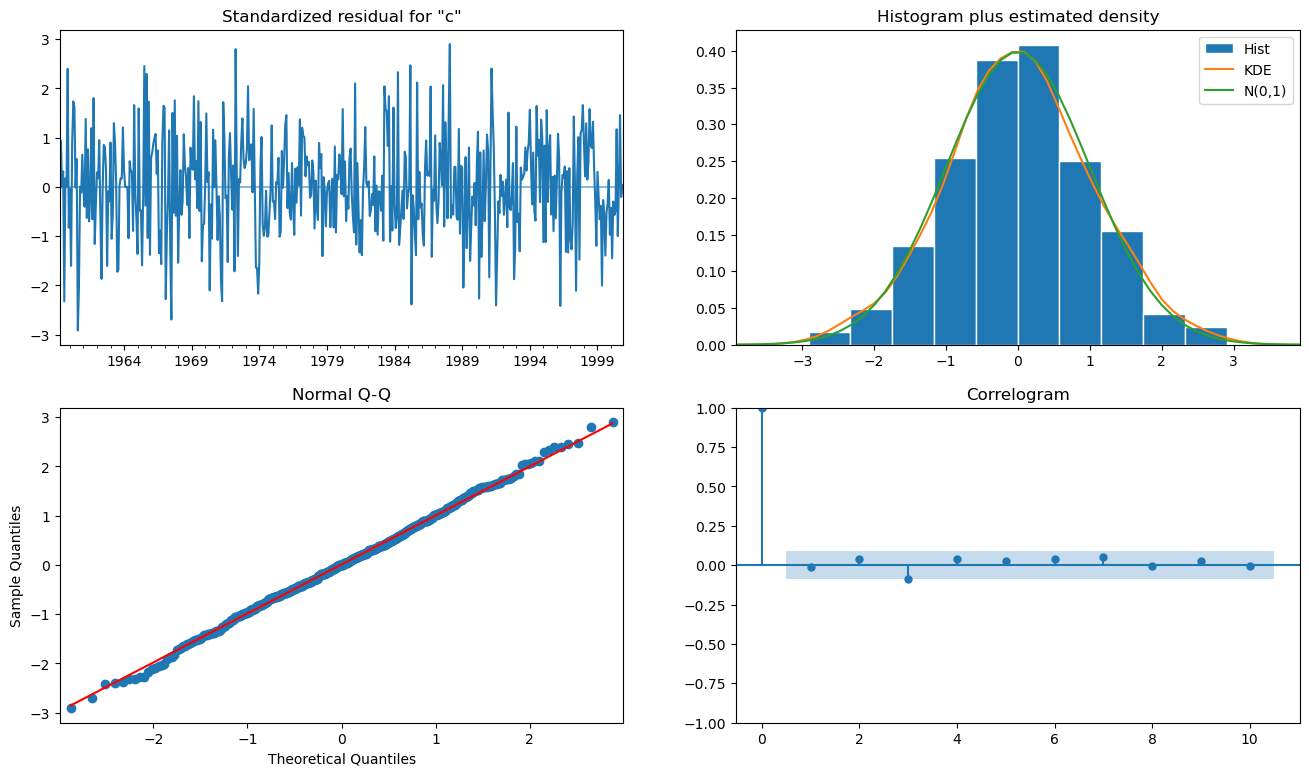

In [10]:
model.fit().plot_diagnostics(figsize = (16,9))
plt.show()